# IMDB Notebook Project

In [1]:
# renders plots inline as output
%matplotlib inline

# Global installs for required packages
import pandas as pd
import numpy as np
from datetime import date
import matplotlib as plt

## read in the weather data file with pandas

In [2]:
df = pd.read_csv('./movie_metadata.csv', error_bad_lines=False).drop_duplicates()
df.head(30)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


## What's the probability that a movie was longer than an hour and a half?

In [3]:
(df['duration'][df.duration > 90].count()) / df.duration.dropna().count()

0.8101545253863135

## Two Hours?

In [4]:
(df['duration'][df.duration > 120].count()) / df.duration.dropna().count()

0.21312462372065022

## What's the probability that a movie was directed by Stephen Spielberg?

In [5]:
df.director_name[df.director_name == 'Steven Spielberg'].count() / df.director_name.dropna().count()

0.005311542390194076

## What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [6]:
clint_eastwood_busts = df[df.director_name == 'Clint Eastwood'][df.gross < df.budget].director_name.count()
clint_eastwood_movie_count = df['director_name'][df.director_name == 'Clint Eastwood'].count()
clint_eastwood_busts / clint_eastwood_movie_count

# df['over_budget'] = df[['gross', 'budget']].apply(lambda x: 1 if (df.gross < df.budget) else 0)


/Users/TBone/code_fellows/401/data-science/ENV/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.35

## What's the probability that a movie generally grossed more than its budget?

In [7]:
all_movie_gross_more = df[df.gross > df.budget].gross.count()
all_movie_count = df.gross.count()
all_movie_gross_more / all_movie_count

0.492725509214355

In [8]:
all_movie_gross_more

2032

In [9]:
all_movie_count

4124

## What's the probability that a movie grossed over the average gross of this data set?


In [10]:
avg_gross= df.gross.mean()
df[df.gross > avg_gross].gross.count() / df.gross.count()

0.31910766246362754

In [11]:
# For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. 
# A false positive would be a movie that was highly-rated but did poorly in the box office (gross < budget). 
# A false negative would be a movie that was poorly-rated but did great in the box office (gross > budget).

## In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?

In [12]:
# False Positive Rate: imdb_score >= 6 and gross < budget

In [13]:
fal_pos_rate = df[df.imdb_score >= 6][df.gross < df.budget].imdb_score.count() / df.imdb_score.count()
fal_pos_rate

/Users/TBone/code_fellows/401/data-science/ENV/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.24289715886354543

In [14]:
df[df.imdb_score >= 6][df.gross < df.budget][['movie_title', 'imdb_score']].head()

/Users/TBone/code_fellows/401/data-science/ENV/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,movie_title,imdb_score
2,Spectre,6.8
5,John Carter,6.6
7,Tangled,7.8
11,Superman Returns,6.1
12,Quantum of Solace,6.7


## False Negative Rate: imdb_score <= 6 and gross > budget

In [15]:
fal_neg_rate = df[df.imdb_score < 6][df.gross > df.budget].imdb_score.count() / df.imdb_score.count()
fal_neg_rate

/Users/TBone/code_fellows/401/data-science/ENV/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.09223689475790316

In [16]:
df[df.imdb_score < 6][df.gross > df.budget].head()

/Users/TBone/code_fellows/401/data-science/ENV/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
37,Color,Michael Bay,378.0,165.0,0.0,808.0,Sophia Myles,974.0,245428137.0,Action|Adventure|Sci-Fi,...,918.0,English,USA,PG-13,210000000.0,2014.0,956.0,5.7,2.35,56000
122,Color,Shawn Levy,185.0,105.0,189.0,1000.0,Rami Malek,49000.0,177243721.0,Adventure|Comedy|Family|Fantasy,...,209.0,English,USA,PG,150000000.0,2009.0,3000.0,5.9,2.35,2000
174,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
213,Color,Louis Leterrier,344.0,106.0,255.0,850.0,Jason Flemyng,14000.0,163192114.0,Action|Adventure|Fantasy,...,637.0,English,USA,PG-13,125000000.0,2010.0,1000.0,5.8,2.35,15000
222,Color,Tim Story,262.0,92.0,167.0,702.0,Ioan Gruffudd,11000.0,131920333.0,Action|Adventure|Sci-Fi|Thriller,...,436.0,English,USA,PG,130000000.0,2007.0,2000.0,5.6,2.35,0


## If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

In [17]:
tom_hanks_gross = df[df.actor_1_name == 'Tom Hanks'].gross.mean()
tom_hanks_gross / df[df.actor_1_name == 'Tom Hanks'].budget.mean()

1.924857945754717

In [18]:
harrison_ford_earnings = df[df.actor_1_name == 'Harrison Ford'].gross.mean()
harrison_ford_earnings / df[df.actor_1_name == 'Harrison Ford'].budget.mean()

2.8038465588723622

In [19]:
## harrison ford it is!

## Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

In [20]:
df[df.actor_1_name == 'Tom Hanks'].imdb_score.mean()

7.425000000000001

In [21]:
df[df.actor_1_name == 'Harrison Ford'].imdb_score.mean()

7.15925925925926

## What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

In [22]:
df[df.duration > 70][df.duration < 90].duration.count() / df.duration.count()

/Users/TBone/code_fellows/401/data-science/ENV/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.13245033112582782

## How does the distribution of movie budgets compare to the movie gross values?

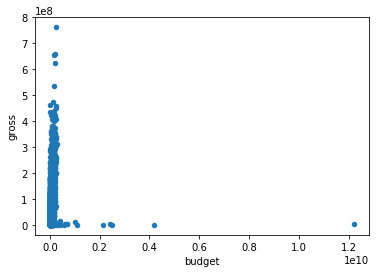

In [23]:
df[['budget', 'gross']].plot(x='budget', y='gross', kind='scatter')

## Which genre trends toward the highest gross-to-budget ratio? You may have to do some extra parsing to answer this question.
### Scott says we can skip this question

In [24]:
df.genres.apply(lambda x: x.split('|'))

0                    [Action, Adventure, Fantasy, Sci-Fi]
1                            [Action, Adventure, Fantasy]
2                           [Action, Adventure, Thriller]
3                                      [Action, Thriller]
4                                           [Documentary]
5                             [Action, Adventure, Sci-Fi]
6                            [Action, Adventure, Romance]
7       [Adventure, Animation, Comedy, Family, Fantasy...
8                             [Action, Adventure, Sci-Fi]
9                   [Adventure, Family, Fantasy, Mystery]
10                            [Action, Adventure, Sci-Fi]
11                            [Action, Adventure, Sci-Fi]
12                                    [Action, Adventure]
13                           [Action, Adventure, Fantasy]
14                           [Action, Adventure, Western]
15                   [Action, Adventure, Fantasy, Sci-Fi]
16                   [Action, Adventure, Family, Fantasy]
17            

## Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

In [25]:
df[df.actor_1_name == 'Nicolas Cage'].imdb_score.mean()

6.2125

In [26]:
df.imdb_score.mean()

6.441056422569028

In [27]:
df.imdb_score.std()

1.1241072968122818

## No, his movies are only .23 points below the average, well within the 1.12 standard deviation.

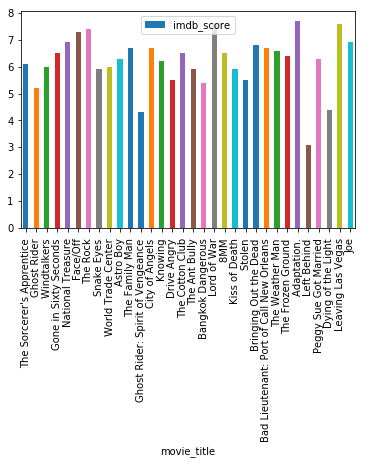

In [28]:
df[df.actor_1_name == 'Nicolas Cage'][['movie_title', 'imdb_score']].plot(x='movie_title', y='imdb_score', kind='bar')

## Have any years grossed a statistically-significant higher amount than the other years?

In [29]:
gross_yearly = df[['title_year', 'gross']].groupby('title_year')
sum_gross = gross_yearly['gross'].sum()
sum_gross.sort_values(ascending=False).head()

title_year
2013.0    1.049929e+10
2012.0    1.041541e+10
2014.0    1.022056e+10
2010.0    9.917119e+09
2009.0    9.901023e+09
Name: gross, dtype: float64

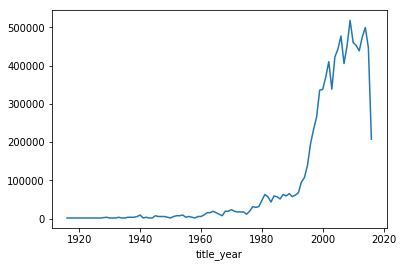

In [30]:
gross_yearly['title_year'].sum().plot()

In [31]:
# Yes, every year after 1995.

## Is there a country that seems to have a larger total budget for movies than any other?

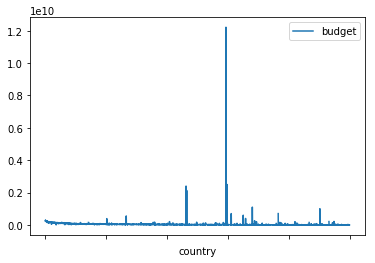

In [32]:
df.plot(x='country', y='budget')